In [1]:
#Import the necessary libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

In [2]:
 #Load dataset
df = pd.read_csv('spam_ham_dataset.csv')
print("\nOriginal Dataset:")
print(df.head())


Original Dataset:
     id label                                               text  label_num  \
0   605   ham  Subject: enron methanol ; meter # : 988291\r\n...          0   
1  2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...          0   
2  3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...          0   
3  4685  spam  Subject: photoshop , windows , office . cheap ...          1   
4  2030   ham  Subject: re : indian springs\r\nthis deal is t...          0   

   sentiment  saftey_score  
0   positive           100  
1   positive           100  
2    neutral             0  
3  negative           -100  
4   positive           100  


In [3]:
#Check for null values
null_values = df.isnull().sum()
print("\nNull Values:")
print(null_values)


Null Values:
id                0
label             0
text            172
label_num         0
sentiment         0
saftey_score      0
dtype: int64


In [4]:
#Drop null values
df = df.dropna()

In [5]:
#Display cleaned dataset
print("\nCleaned Dataset:")
print(df.head())


Cleaned Dataset:
     id label                                               text  label_num  \
0   605   ham  Subject: enron methanol ; meter # : 988291\r\n...          0   
1  2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...          0   
2  3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...          0   
3  4685  spam  Subject: photoshop , windows , office . cheap ...          1   
4  2030   ham  Subject: re : indian springs\r\nthis deal is t...          0   

   sentiment  saftey_score  
0   positive           100  
1   positive           100  
2    neutral             0  
3  negative           -100  
4   positive           100  


In [6]:
# Filter the dataset for spam (label = 1)
spam_df = df[df['label_num'] == 1]


In [7]:
# Filter the dataset for ham (label = 0)
ham_df = df[df['label_num'] == 0]

In [8]:
print("\nSpam Dataset:")
print(spam_df.head())


Spam Dataset:
      id label                                               text  label_num  \
3   4685  spam  Subject: photoshop , windows , office . cheap ...          1   
7   4185  spam  Subject: looking for medication ? we ` re the ...          1   
10  4922  spam  Subject: vocable % rnd - word asceticism\r\nvc...          1   
11  3799  spam  Subject: report 01405 !\r\nwffur attion brom e...          1   
13  3948  spam  Subject: vic . odin n ^ ow\r\nberne hotbox car...          1   

    sentiment  saftey_score  
3   negative           -100  
7   negative           -100  
10  negative           -100  
11  negative           -100  
13  negative           -100  


In [9]:
print("\nHam Dataset:")
print(ham_df.head())


Ham Dataset:
     id label                                               text  label_num  \
0   605   ham  Subject: enron methanol ; meter # : 988291\r\n...          0   
1  2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...          0   
2  3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...          0   
4  2030   ham  Subject: re : indian springs\r\nthis deal is t...          0   
5  2949   ham  Subject: ehronline web address change\r\nthis ...          0   

  sentiment  saftey_score  
0  positive           100  
1  positive           100  
2   neutral             0  
4  positive           100  
5  positive           100  


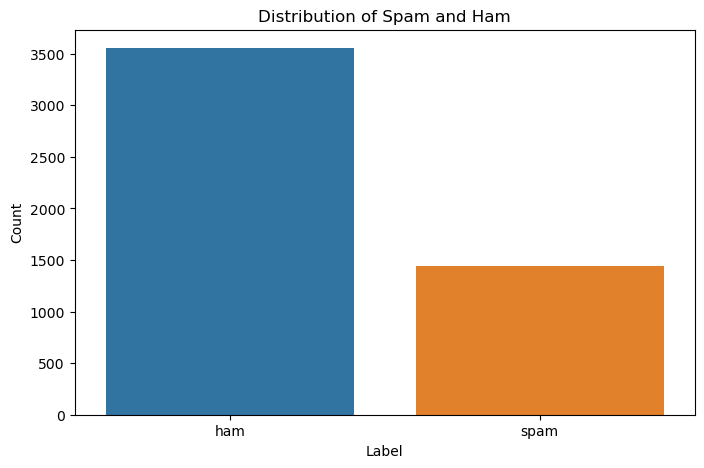

In [10]:
# Visualize the distribution of labels
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam and Ham')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [11]:
# Encode labels
le = LabelEncoder()
df['label_num'] = le.fit_transform(df['label'])

In [12]:
# Define features and labels
X = df['text']
y = df['label_num']

In [13]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Vectorize text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [15]:
# Train and evaluate decision tree classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
#Make predictions with decision tree
y_pred = dtree.predict(X_test_tfidf)

In [17]:
#calculate metrics for decision tree
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [18]:
print("Decision Tree Classifier Metrics:")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1 * 100}%")
print(f"Precision: {precision* 100}%")
print(f"Recall: {recall}")

Decision Tree Classifier Metrics:
Accuracy: 0.952
F1 Score: 91.94630872483222%
Precision: 92.25589225589226%
Recall: 0.9163879598662207


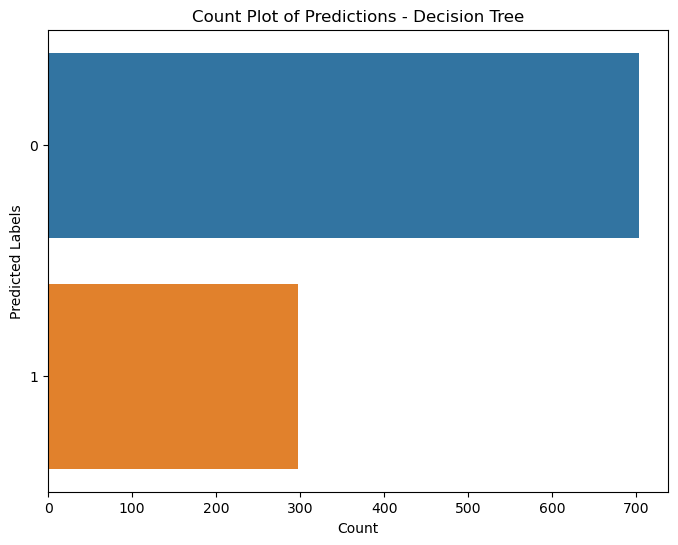

In [19]:
# Visualize decision tree Predictions
plt.figure(figsize=(8, 6))
sns.countplot(y=y_pred)
plt.title('Count Plot of Predictions - Decision Tree')
plt.xlabel('Count')
plt.ylabel('Predicted Labels')
plt.show()

In [20]:
# Train and evaluate random forest classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_tfidf, y_train)
y_pred_rfc = rfc.predict(X_test_tfidf)

In [21]:
# Calculate metrics for random forest
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc)

In [22]:
print("\nRandom Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_rfc}")
print(f"F1 Score: {f1_rfc}")
print(f"Precision: {precision_rfc}")
print(f"Recall: {recall_rfc}")


Random Forest Classifier Metrics:
Accuracy: 0.987
F1 Score: 0.9784411276948591
Precision: 0.9703947368421053
Recall: 0.9866220735785953


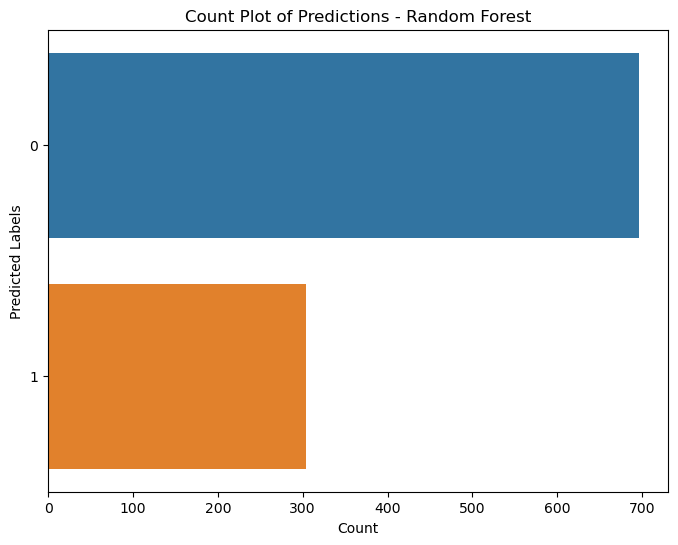

In [23]:
# Visualize random forest predictions
plt.figure(figsize=(8, 6))
sns.countplot(y=y_pred_rfc)
plt.title('Count Plot of Predictions - Random Forest')
plt.xlabel('Count')
plt.ylabel('Predicted Labels')
plt.show()

In [24]:
# Train and evaluate adaBoost classifier
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train_tfidf, y_train)

AdaBoostClassifier(random_state=42)

In [25]:
# Make predictions with adaBoost
y_pred_ada = ada.predict(X_test_tfidf)

In [26]:
# Calculate metrics for adaBoost
accuracy_ada = accuracy_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)

In [27]:
print("\nAdaboost Classifier Metrics:")
print(f"Accuracy: {accuracy_ada}")
print(f"F1 Score: {f1_ada}")
print(f"Precision: {precision_ada}")
print(f"Recall: {recall_ada}")


Adaboost Classifier Metrics:
Accuracy: 0.972
F1 Score: 0.9534883720930233
Precision: 0.9471947194719472
Recall: 0.959866220735786


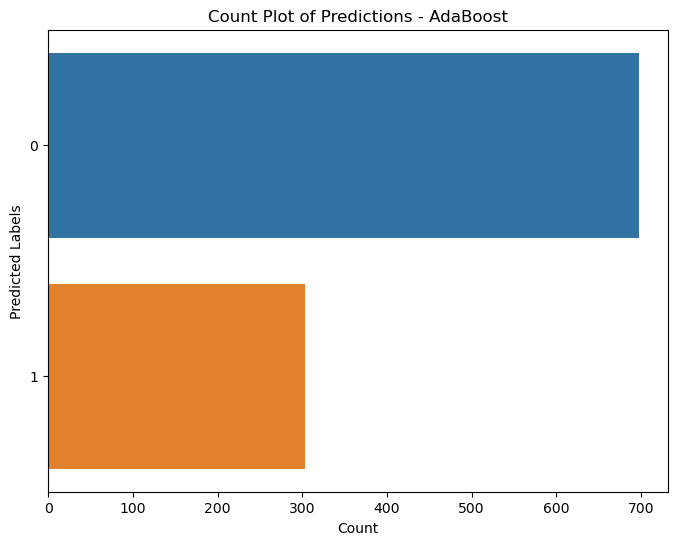

In [28]:
# Visualize adaBoost predictions
plt.figure(figsize=(8, 6))
sns.countplot(y=y_pred_ada)
plt.title('Count Plot of Predictions - AdaBoost')
plt.xlabel('Count')
plt.ylabel('Predicted Labels')
plt.show()

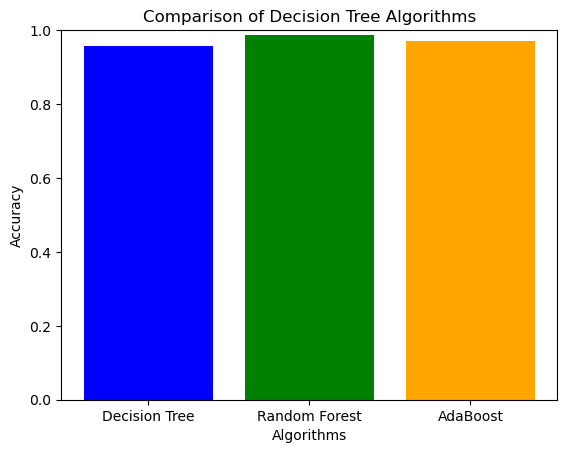

In [29]:
# Accuracy values for each algorithm
accuracy_values = [0.958, 0.987, 0.97]

algorithms = ['Decision Tree', 'Random Forest', 'AdaBoost']

# Creating the bar plot
plt.bar(algorithms, accuracy_values, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)  # Setting the y-axis limit to represent accuracy percentage

# Adding labels and title
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Decision Tree Algorithms')

# Display the plot
plt.show()